<div style="border:solid green 2px; padding: 20px">
<b>Привет Виктория!</b>

Меня зовут  Евгений Арзамасцев, я твой тимлид по этому проекту. Буду проверять следующие этапы твоей работы:
<p> * План работ и уточняющие вопросы
<p> * Основной код разработки модели (но это не точно)
<p> * Отчет о проделанной работе

 Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать отличным специалистом по Data Science. Ты уже проделал большую работу над проектами этого курса. Сейчас у тебя Финальный Спринт - дипломная работа. Моя цель - помочь тебе сделать ее максимально качественно, чтобы было не стыдно ссылаться на данную работу в своем резюме!

Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к таким ситуациям. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий тимлида ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий тимлида ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий тимлида ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Прогнозирование оттока клиентов

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Цель**: модель должна предсказывать, уйдет ли клиент или останется. В случае возможного ухода клиента, предложить особые условия обслуживания, которые позволит сохранить его (клиента) и сэкономить на привлечении нового клиента. В качестве основной метрики выбран ROC-AUC, оценка которой в идеале должна быть выше 0.85. На создание прототипа модели отведено 4 дня. Еще 4 дня на подготовку отчета.

**План работы:**
1. Изучить данные и сделать предобработку
    * Разобраться с пустыми строками
    * Соединить таблицы (можно после анализа данных)
2. Провести исследовательский анализ данных
3. Подобрать 3 модели (возможны изменения) и выбрать лучшую:
    * Логистическая регрессия
    * Метод случайного леса
    * KNN-метод
4. Сделать отчет по проведенной работе

_Часть предобработки данных я сделала до встречи по зуму, поэтому решила оставить как есть, только добавила план._ <br>
**Вопросов нет** (пока что)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

1. Есть план работ. Указанны все основные этапы исследования! Вижу что понимаешь что предстоит делать, уверен инструментарий тоже подберешь верно!
    
2. Вопросов нет. Отлично!
</div>

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Данное исследование можно будет приложить к портфолио и показывать потенциальным работодателям на собесах. По этому предлагаю сразу же оформлять его в соответствии с требованиями к исследованию. В описательной части не хватает:
    
- хорошего названия проекта
- краткого описания текущей ситуации (что послужило причиной возникновения проекта)
- описания исходных данных
   
Касаемо цели - я рекомендую ее немного изменить и привести в соответствие с требованиями SMART. Если интересно - почитай вот тут https://www.carrotquest.io/blog/smart-goal/. Можно привести SMARTированную цель проекта уже потом, на следующем этапе.
    
Пожалуйста доработай этот раздел.
</div>

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Отлично, так значительно лучше!
</div>

## Предобработка и Исследовательский анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier, Pool

In [2]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

### Контракты

In [3]:
display(contract_df.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


**Целевой признак**: целевым признаком станет дата окончания договора `EndDate`. Таргет следует сделать бинарным.

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Все верно! Это будет таргет, и его закодируем в бинарном виде.
</div>

In [4]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


`TotalCharges`: необходимо поменять на тип данных `float64` <br>
`BeginDate` и `EndDate`: необходимо поменять на тип данных `datetime`

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Правильно!
</div>

In [5]:
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'], format='%Y-%m-%d')

In [6]:
contract_df['BeginDate'].sort_values(ascending=True)

4513   2013-10-01
4610   2013-10-01
3439   2013-10-01
975    2013-11-01
3040   2013-11-01
          ...    
3331   2020-02-01
6670   2020-02-01
936    2020-02-01
3826   2020-02-01
6754   2020-02-01
Name: BeginDate, Length: 7043, dtype: datetime64[ns]

In [7]:
# Замена типа данных с str на float
# contract_df['TotalCharges'] = contract_df['TotalCharges'].astype('float64')

# ---> ValueError: could not convert string to float: ''

Ошибка. Надо посмотреть первые пять строк с пустыми значениями.

In [8]:
display(contract_df[contract_df['TotalCharges'] == ' '].head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,


По идее, если дата начала договора 2020-02-01, то можно понять, почему в колонке `TotalCharges` пустые строки — клиент еще не успел оплатить подписку и одного месяца. _Эти пробелы можно заполнить нулями._

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Из кода не понятно почему ты решила что в данных есть contract_df['TotalCharges'] == ' '. Пока желтый комментарий, далее если твои выводы и ход рассуждений не будет подтвержден кодом выше - будет красный.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

Изначально я пыталась изменить тип данных, и мне как раз выдавалась ошибка, и я решила посмотреть эти пустые строки, из-за которых ошибка. После изучения этих строк, пришла к выводу, описанному выше. </div>

In [9]:
# Замена пустых строк нулями
contract_df['TotalCharges'] = contract_df['TotalCharges'].replace(' ', 0.0)

In [10]:
# Замена типа данных с str на float
contract_df['TotalCharges'] = contract_df['TotalCharges'].astype('float64')

С замененным типом данных и пропусками можно посмотреть на обновленную таблицу:

In [11]:
display(contract_df[contract_df['TotalCharges'] == 0.0].head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0.0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0.0


In [12]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


Типы данных стоят те, какие и должны быть.

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Да, молодец! Исправила проблемы в данных.
</div>

In [13]:
print('Доля действующих договоров:',
      contract_df[contract_df['EndDate'] == 'No']['EndDate'].count() / contract_df['EndDate'].count())

Доля действующих договоров: 0.7346301292063041


<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Да, есть дисбаланс целевого признака. Есть несколько вариантов в нашем случае:
   
- ничего не делать тк дисбаланс пограничный на уровне 1:3
- применить сэмплирование
- воспользоваться встренными средствами балансировки в моделях
    
А можно выполнить все три варианта и выбрать лучший)
    
Посмотрим какой вариант выберешь ты в итоге.
</div>

In [14]:
display(contract_df.describe())

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


**Ежемесячные платежи**: Медиана от среднего слабо отличаются, поэтому можно сказать, что выбросов практически нет.

**Суммарные платежи**: Здесь можно увидеть, как сильно отличается среднее в большую сторону от медианы. В этом признаке выбросы сильные.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Charges')

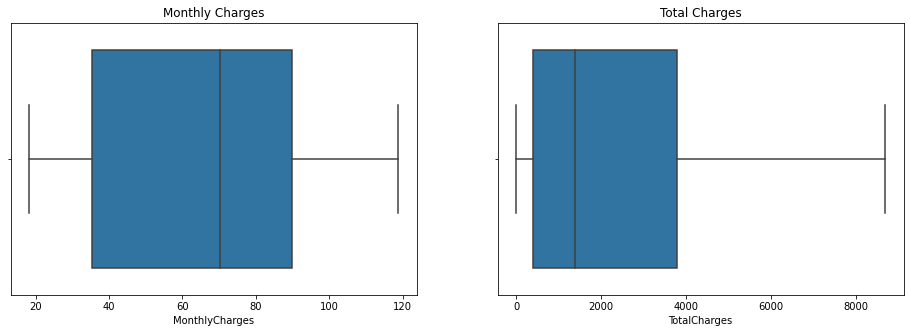

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax1 = sns.boxplot(contract_df['MonthlyCharges'], ax=ax[0]);
ax1.set_title('Monthly Charges')

ax2 = sns.boxplot(contract_df['TotalCharges'], ax=ax[1]);
ax2.set_title('Total Charges')

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Ты видишь смешение данных относительно медианы. Но выбросы лучше смотреть на боксплоте.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
На втором боксплоте выбросов как бы нет, но смещение вправо, конечно, наблюдается. </div>

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Да, все верно, выбросов нет, есть смещение медианы.
</div>

### Персональные данные

In [16]:
display(personal_df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [17]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


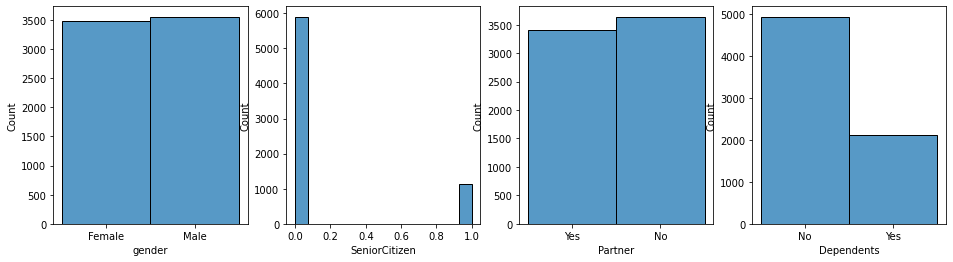

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(16, 4))

ax0 = sns.histplot(personal_df['gender'], ax=ax[0])
ax1 = sns.histplot(personal_df['SeniorCitizen'], ax=ax[1])
ax2 = sns.histplot(personal_df['Partner'], ax=ax[2])
ax3 = sns.histplot(personal_df['Dependents'], ax=ax[3])

* У нас наблюдается сбалансированные признаки `gender` и `Partner`.
* А признаки `SeniorCitizen` и `Dependents` уже несбалансированы.
* Также нужно поменять название `gender` на `Gender`.

Признаки `SeniorCitizen` и `Dependets` можно попробовать сбалансировать.

In [19]:
personal_df = personal_df.rename({'gender': 'Gender'}, axis=1)

### Интернет услуги

In [20]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [21]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


В этой таблице содержатся ID пользователей, у которых активна мининум одна услуга. Поэтому при присоединении этой таблицы к основной, пропуски заполним значениями `No`.

Посмотрим также на распределения классов.

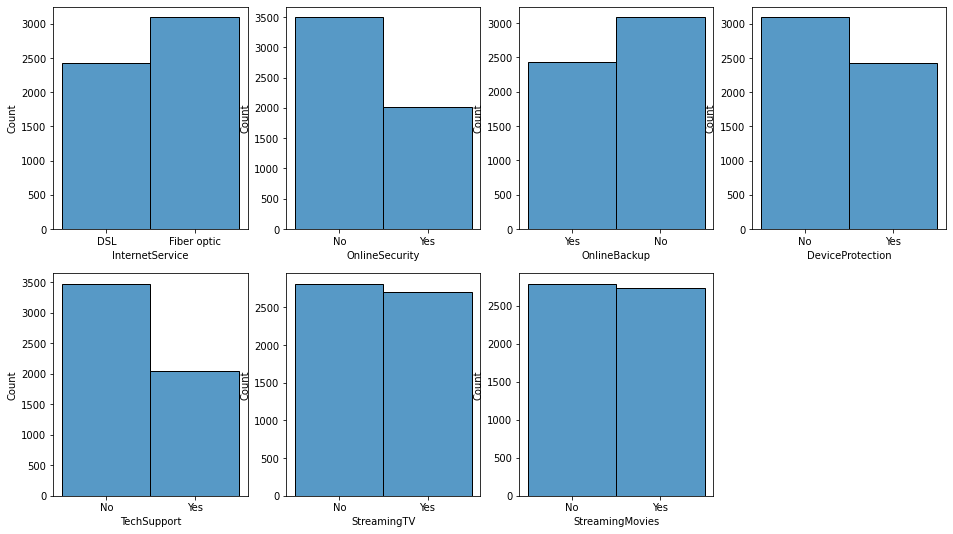

In [22]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(16, 9))

ax0 = sns.histplot(internet_df['InternetService'], ax=ax[0, 0])
ax1 = sns.histplot(internet_df['OnlineSecurity'], ax=ax[0, 1])
ax2 = sns.histplot(internet_df['OnlineBackup'], ax=ax[0, 2])
ax3 = sns.histplot(internet_df['DeviceProtection'], ax=ax[0, 3])
ax4 = sns.histplot(internet_df['TechSupport'], ax=ax[1, 0])
ax5 = sns.histplot(internet_df['StreamingTV'], ax=ax[1, 1])
ax6 = sns.histplot(internet_df['StreamingMovies'], ax=ax[1, 2])

fig.delaxes(ax[1, 3])

* Здесь наблюдается дисбаланс классов на 50% у `OnlineSecurity` и `TechSupport`
* У оставшихся классов с этим более менее нормально.

### Подключение нескольких линий

In [23]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [24]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Логично предположить здесь то же самое (про заполнение пропусков значениями `No`). Но лучше проверить основную таблицу `contact_df` на наличие дубликатов в колонке `customerID`. Может в основной таблице одни и те же ID могли заключать несколько договоров в разные промежутки времени.

In [25]:
print('Кол-во дублей:', contract_df['customerID'].duplicated().sum())

Кол-во дублей: 0


Догадка не подтвердилась. Все ID пользователей разные.

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Есть план, есть уточняющие вопросы, есть предварительное исследование данных. 

Осталось немного доработать тетрадку в соответствии с моими замечаниями. Жду исправленную версию!
</div>

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Есть план, есть уточняющие вопросы, есть предварительное исследование данных. 

Отлично, работу приниаю, переходи к следующему этапу исследования - разработка модели.
</div>

### Соединение таблиц

In [26]:
data = contract_df.merge(personal_df, how='left', on='customerID')
data = data.merge(internet_df, how='left', on='customerID')
data = data.merge(phone_df, how='left', on='customerID')

In [27]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Теперь все пропуски заполним `No`, т.к. если ID клиента отсутствовало в той или иной таблице, то можно предположить, что теми услугами он не пользовался.

In [29]:
data = data.fillna('No')

In [30]:
print('Кол-во пропусков в датасете:', data.isna().sum())

Кол-во пропусков в датасете: customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64


<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Есть объединение таблиц!
    
Отличная работа по заполнению признаков. Хорошо что оставляешь бинарные признаки бинарными - No не увеличивает вариантов для бинарных признаков (некоторые заполняют значением типа NA или UNKNOWN что негативно влияет на качетво модели).
</div>

**Теперь создадим бинарный таргет**

In [31]:
data['isChurn'] = list(map(lambda x: 0 if (x == 'No') else 1, data['EndDate']))

In [32]:
data['isChurn'].head()

0    0
1    0
2    1
3    0
4    1
Name: isChurn, dtype: int64

Отлично, теперь проверим признаки на мультиколлениарность и удалим лишние. Будем использовать VIF, для этого нужно перевести данные в численные типы. Используем разные виды кодирования.

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Есть таргет!
</div>

Теперь создадим синтетический признак, который будет кол-во дней, сколько провел клиент с компанией.

In [33]:
data['EndDate'] = data['EndDate'].replace('No', '2020-02-01')

data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m-%d')

In [34]:
data['Days'] = (data['EndDate'] - data['BeginDate']).dt.days

<div class="alert alert-success">
<b>**Комментарий тимлида_v3 ✔️:**</b>

А вот и новый важный признак!
</div>

### Проверка на мультиколлинеарность

In [35]:
data = data.drop(['BeginDate', 'EndDate', 'customerID'], axis=1)

Чтобы не множить дамми колонки через OHE, используем LabelEncoder для тех колонок, где всего два категориальных признака. LabelEncoder используется т.к. через него есть возможность передать одномерный массив, результатом которого можно будет датафрейм, а не вектор, как у OrdinalEncoder. А это удобно для дальнейшей работы.

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Молодец что удаляешь признаки с временем - у нас задача бинарной классификации, а не анализ временных рядов. Кроме этого даты - в нашем случае это утечка целевого признака (особенно дата окончания) 
</div>

In [36]:
print(data['Type'].unique())
print(data['InternetService'].unique())
print(data['PaymentMethod'].unique())

['Month-to-month' 'One year' 'Two year']
['DSL' 'Fiber optic' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


У колонки `Type` можно обнаружить порядок, поэтому для него тоже используем LabelEncoder.

In [37]:
features_ordinal = list(data.drop(['PaymentMethod', 'SeniorCitizen', 'InternetService', 'isChurn', 'MonthlyCharges',
                                   'TotalCharges'], axis=1).columns)

In [38]:
# Копиравоние датафрейма в новую переменную, чтобы потом была возможность работать со старым датафреймом
data_enc = data.copy()

In [39]:
for col in features_ordinal:
    data_enc[col] = LabelEncoder().fit_transform(data[col])
    
data_enc.head() 

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,isChurn,Days
0,0,1,Electronic check,29.85,29.85,0,0,1,0,DSL,0,1,0,0,0,0,0,0,2
1,1,0,Mailed check,56.95,1889.50,1,0,0,0,DSL,1,0,1,0,0,0,0,0,74
2,0,1,Mailed check,53.85,108.15,1,0,0,0,DSL,1,1,0,0,0,0,0,1,3
3,1,0,Bank transfer (automatic),42.30,1840.75,1,0,0,0,DSL,1,0,1,1,0,0,0,0,96
4,0,1,Electronic check,70.70,151.65,0,0,0,0,Fiber optic,0,0,0,0,0,0,0,1,3


In [40]:
data_dummies = pd.get_dummies(data[['PaymentMethod', 'InternetService']], drop_first=True)

data_dummies.head()

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,1,0,1,0


In [41]:
# Соединение таблиц по индексам
data_enc = data_enc.join(data_dummies)

# Удаление object колонок
data_enc = data_enc.drop(['PaymentMethod', 'InternetService'], axis=1)

In [42]:
data_enc.head()

,Type,PaperlessBilling,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,MultipleLines,isChurn,Days,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,2,0,1,0,0,0
1,1,0,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,0,74,0,0,1,0,0
2,0,1,53.85,108.15,1,0,0,0,1,1,...,0,0,0,1,3,0,0,1,0,0
3,1,0,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,96,0,0,0,0,0
4,0,1,70.70,151.65,0,0,0,0,0,0,...,0,0,0,1,3,0,1,0,1,0


<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Интересный подход к кодированию  - часть OHE, часть Label Encoding. Не совсем согласен с обоснованием применения LE в нашем случае для сохранения порядка (возможности сравнения значений признаков)
</div>

<div class="alert alert-warning">
<b>**Комментарий тимлида_v2 ⚠️:**</b>

Кодирование необходимо для большинства моделей. OHE или Label Encoder вполне допустимый вариант. Но желательно кодировать уже после разбиения на трейн и тест. В этом случае мы сможем исключить возможные утечки между выборками, кроме этого при формировании пайплайна в проде у тебя будет на вход потупать только тест, который надо будет кодировать перед передачей в модель.
    
Так же хочу отметить, что многие алгоритмы градиентного бустинга могут (и хотят) принимать на вход "грязные данные".
</div>

In [43]:
# Выделение нужных признаков в закодированном датафрейме
features = list(data_enc.drop(['isChurn'], axis=1).columns)

In [44]:
# подсчет vif для всех подаваемых признаков
def compute_vif(features):
    
    X = data_enc[features]
    X['intercept'] = 1
    
    # Создание датафрейма для хранения vif-значений
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

In [45]:
compute_vif(features).sort_values('VIF', ascending=False)

,Variable,VIF
2,MonthlyCharges,35.307380
3,TotalCharges,10.772273
19,InternetService_Fiber optic,10.094754
15,Days,7.557368
20,InternetService_No,4.847748
0,Type,2.506311
12,StreamingTV,2.451814
13,StreamingMovies,2.435920
17,PaymentMethod_Electronic check,1.975474
14,MultipleLines,1.919611


Можно увидеть сильную зависимость от признака `MonthlyCharges`. Будем удалять последовательно признаки, начиная с этого.

In [46]:
features.remove('MonthlyCharges')

compute_vif(features).sort_values('VIF', ascending=False)

/tmp/ipykernel_63/1579707019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
2,TotalCharges,10.219714
14,Days,7.193266
0,Type,2.504028
19,InternetService_No,2.494227
18,InternetService_Fiber optic,2.262436
16,PaymentMethod_Electronic check,1.974544
17,PaymentMethod_Mailed check,1.859686
12,StreamingMovies,1.724627
11,StreamingTV,1.713751
15,PaymentMethod_Credit card (automatic),1.560610


In [47]:
features.remove('TotalCharges')

In [48]:
compute_vif(features).sort_values('VIF', ascending=False)

/tmp/ipykernel_63/1579707019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
13,Days,2.759208
0,Type,2.488154
18,InternetService_No,2.477014
15,PaymentMethod_Electronic check,1.971259
16,PaymentMethod_Mailed check,1.840883
17,InternetService_Fiber optic,1.736077
11,StreamingMovies,1.630669
10,StreamingTV,1.624289
14,PaymentMethod_Credit card (automatic),1.560295
9,TechSupport,1.479218


Дальше удалять признаки не нужно, т.к. никакие из них не превышают значения `5`. Можно предположить, что утечки данных не должно произойти.

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Очень хороший подход для анализа общего влияния признака на остальные. 

Можно использовать библиотеку phik. Она работает как с категориальными так и с числовыми признаками. Рекомендую для ознакомления.

Напоминаю - два признака называются мультиколлинеарными, если они сильно коррелированы/зависимы. Изменения в одном признаке влекут за собой изменения в другом признаке. Мультиколлинеарность влияет на алгоритмы линейной регрессии, логистической регрессии, KNN и Наивного Байеса. В случае использования этих моделей нужно избавляться от мультиколлинеарности (удалять один из признаков).
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
Спасибо, прочитала про библиотеку. </div>

In [49]:
data_enc_linear = data_enc.drop(['MonthlyCharges', 'TotalCharges'], axis=1)

<AxesSubplot:xlabel='isChurn', ylabel='Count'>

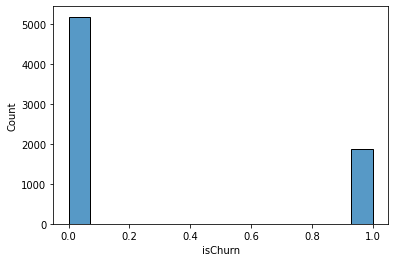

In [50]:
sns.histplot(data['isChurn'])

<div class="alert alert-success">
<b>**Комментарий тимлидам_ v2 ✔️:**</b>

Да, есть дисбаланс целевого признака. Есть несколько вариантов в нашем случае:
   
- ничего не делать тк дисбаланс пограничный на уровне 1:3
- применить сэмплирование
- воспользоваться встренными средствами балансировки в моделях
    
А можно выполнить все три варианта и выбрать лучший)
    
Посмотрим какой вариант выберешь ты в итоге.
</div>

<div class="alert alert-warning">
<b>**Комментарий тимлида_v2 ⚠️:**</b>

Не совсем понял что это за ячейки - они не кодовые. Это специально сделано?
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
Shesh, это был ЭкСпЕриМенТ. Удалила эти ячейки. </div>

<div class="alert alert-success">
<b>**Комментарий тимлида_v3 ✔️:**</b>

)))
    
</div>

## Создание прототипа модели

### Разделение выборок

In [51]:
# Выделение признаков и таргета
X = data_enc_linear.drop(['isChurn'], axis=1)
y = data_enc_linear['isChurn']

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=190922)

Проверим, как разделили данные.

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Есть трейн-тест! Только для теста слишком большую выборку делаешь. Достаточно 0.2
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
Исправила </div>

### Logistic Regression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
solver = ['liblinear']

In [ ]:
parameters = dict(C=C,
                  penalty=penalty,
                  solver=solver,
                  random_state=[190922],
                  class_weight=['balanced'])

In [ ]:
gs = GridSearchCV(log_reg, parameters,
                  cv=3,
                  verbose=2,
                 scoring='roc_auc')

In [ ]:
print(log_reg.get_params().keys())

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
print('Best Penalty:', gs.best_estimator_.get_params()['penalty'])
print('Best C:', gs.best_estimator_.get_params()['C'])
print('Best score: ', gs.best_score_)

Тоже самое на нормализованных данных (`TotalCharged`)

In [ ]:
data_normalized = data_enc_linear.copy()

x = X_train['Days'].values # вернет numpy массив
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x.reshape(-1, 1))
X_all = data_normalized['Days'].values
data_normalized['Days'] = min_max_scaler.transform(X_all.reshape(-1, 1))

<div class="alert alert-danger">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Не верно используешь масштабирование. Для предотвращения утечки признаков обучать скейлер нужно на трейне, а вот - принменять как на трейне так и на тесте. Ты же обучаешь на всем датасете. Переделать надо.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
Спасибо! Не знала про это :\ </div>

Проверим результат.

In [ ]:
data_normalized.head()

In [ ]:
# Выделение признаков и таргета нормализированных данных
X = data_normalized.drop(['isChurn'], axis=1)
y = data_normalized['isChurn']

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=190922)

In [ ]:
gs = GridSearchCV(log_reg, parameters,
                  cv=3,
                  verbose=2,
                 scoring='roc_auc')

gs.fit(X_train, y_train)

In [ ]:
print('Лучший Penalty на нормализованных данных:', gs.best_estimator_.get_params()['penalty'])
print('Лучший C:', gs.best_estimator_.get_params()['C'])
print('Лучшая оценка: ', gs.best_score_)

In [ ]:
columns = ['ROC-AUC-SCORE']
indexes = ['Нормализованные данные', 'Обычные данные']
data = [0.8454946416951317, 0.8458297358116109]

lr_cv = pd.DataFrame(data=data, index=indexes, columns=columns)

lr_cv

Как можно увидеть, результаты на кроссвалидации при обычных данных чуть лучше, чем на нормализованных.

### CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()

In [ ]:
# Выделение признаков и таргета
X = data_enc.drop(['isChurn'], axis=1)
y = data_enc['isChurn']

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=190922)

In [ ]:
parameters = {'depth': [1, 3, 5, 7, 10, 13, 15, 17, 20],
             'learning_rate': [.1, .01, .02, .035],
             'iterations': [90, 100, 120, 140, 150, 170, 200],
             'random_state': [190922],
             'loss_function': ['Logloss']}

In [ ]:
grid_cb = GridSearchCV(estimator=cb, param_grid =parameters, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_cb.fit(X_train, y_train)

In [ ]:
print(" Результаты CatBoostClassifier " )
print("\n Лучшая оценка из всех параметров:\n", grid_cb.best_score_)
print("\n Лучшие параметры из всех искомых параметров:\n", grid_cb.best_params_)

### KNN метод

In [ ]:
model = KNeighborsClassifier()

In [ ]:
parameters = {'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform', 'distance'],
             'p': [1, 2]}

In [ ]:
# Выделение признаков и таргета
X = data_enc_linear.drop(['isChurn'], axis=1)
y = data_enc_linear['isChurn']

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=190922)

In [ ]:
model_cv = GridSearchCV(estimator=model, param_grid=parameters, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
model_cv.fit(X_train, y_train)

In [ ]:
print(" Результаты KNN " )
print("\n Лучшая оценка из всех параметров:\n", model_cv.best_score_)
print("\n Лучшие параметры из всех искомых параметров:\n", model_cv.best_params_)

### Метод случайного леса

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
parameters = {'n_estimators': [10, 30, 50, 70, 90, 100],
             'max_depth': [10, 15, 20],
             'random_state': [190922]}

In [ ]:
# Выделение признаков и таргета
X = data_enc.drop(['isChurn'], axis=1)
y = data_enc['isChurn']

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=190922)

In [ ]:
rfc_cv = GridSearchCV(estimator=rfc, param_grid=parameters, n_jobs=-1, verbose=2, scoring='roc_auc')
rfc_cv.fit(X_train, y_train)

In [ ]:
print(" Результаты случайного леса " )
print("\n Лучшая оценка из всех параметров:\n", rfc_cv.best_score_)
print("\n Лучшие параметры из всех искомых параметров:\n", rfc_cv.best_params_)

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Отлично, исследовали несколько различных моделей, подобрали гиперпараметры и получили метрику на кроссвалидации. 
    
Было бы не плохо по итогу вывести общую таблицу моделей и их метрик. Будет очень наглядно.
</div>

## Тестирование модели

Из всех моделей, лучшую оценку на кроссвалидации сделала модель CatBoostClassifier. Её проверим на тестовой.

In [53]:
cb = CatBoostClassifier(depth=5, iterations=200, learning_rate=.1, random_state=190922)

cb.fit(X_train, y_train)

0:	learn: 0.6191808	total: 48.4ms	remaining: 9.62s
1:	learn: 0.5678103	total: 50.5ms	remaining: 5s
2:	learn: 0.5310653	total: 52.3ms	remaining: 3.43s
3:	learn: 0.5095148	total: 53.7ms	remaining: 2.63s
4:	learn: 0.4860166	total: 55.3ms	remaining: 2.16s
5:	learn: 0.4671352	total: 57.1ms	remaining: 1.85s
6:	learn: 0.4539342	total: 58.9ms	remaining: 1.62s
7:	learn: 0.4409611	total: 60.5ms	remaining: 1.45s
8:	learn: 0.4335908	total: 62.2ms	remaining: 1.32s
9:	learn: 0.4262034	total: 63.9ms	remaining: 1.21s
10:	learn: 0.4190165	total: 65.5ms	remaining: 1.13s
11:	learn: 0.4120441	total: 67.3ms	remaining: 1.05s
12:	learn: 0.4087642	total: 68.8ms	remaining: 989ms
13:	learn: 0.4050931	total: 70.6ms	remaining: 938ms
14:	learn: 0.4024052	total: 72.2ms	remaining: 891ms
15:	learn: 0.3995366	total: 74.1ms	remaining: 852ms
16:	learn: 0.3963942	total: 75.7ms	remaining: 815ms
17:	learn: 0.3921831	total: 77.4ms	remaining: 783ms
18:	learn: 0.3898875	total: 79ms	remaining: 752ms
19:	learn: 0.3881897	total:

In [54]:
predict_proba = cb.predict_proba(X_test)[:, 1]

print('ROC-AUC:', roc_auc_score(y_test, predict_proba))

ROC-AUC: 0.9080533033108837


In [55]:
predictions = cb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.8616039744499645


Нарисуем ROC-кривую.

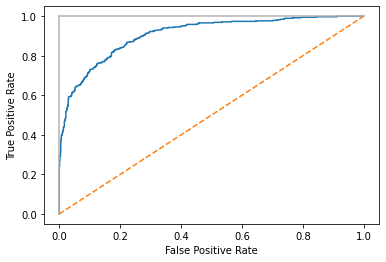

In [56]:
fpr, tpr, _ = roc_curve(y_test, predict_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Можно увидеть, что модель предсказывает не случайно.

Удалось найти модель и подобрать для нее гиперпараметры, которая достигает необходимых метрик.

Итоговая метрика ROC-AUC на тестовой выборке: 0.9080533033108837

<div class="alert alert-warning">
<b>**Комментарий тимлида_v3 ⚠️:**</b>

Итоговая метрика ROC-AUC на тестовой выборке: 0.847879627711174 - эта фраза видимо от старых версий осталась. Нужно удалить.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
Действительно, спасибо! </div>

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Ок, протестировали модель. Можно остановиться на этом (придется выполнить доп. задание, чтобы получить зачет). А можно еще поиграться с признаками - не думала добавить признак, отражающий лояльность клиента - например длительность контракта? Возможно это поможет повысить метрику.
    
Пожалуйста доработай исследование по моим замечаниям и высылай на проверку.
</div>

<div class="alert alert-warning">
<b>**Комментарий тимлида_v2 ⚠️:**</b>

1. Нужно сделать анализ важности признаков итоговой модели. Можно ввиде барплота с сортировкой по важности. 

2. С точки зрения метрики - да, все ок, нужный показатель достигнут. Но вот с точки зрения бизнеса - ROC_AUC плохо интерпретируется. Гораздо лучше отразить дополнительно к этому графику еще и матрицу ошибок - confusion matrix. На основе нее сделать выводы как часто может ошибаться, какой тип ошибки наиболее вероятен и к чему с тз бизнеса это может привести.

Это можно отразить в отчете.
</div>

<AxesSubplot:title={'center':'Важность признаков'}>

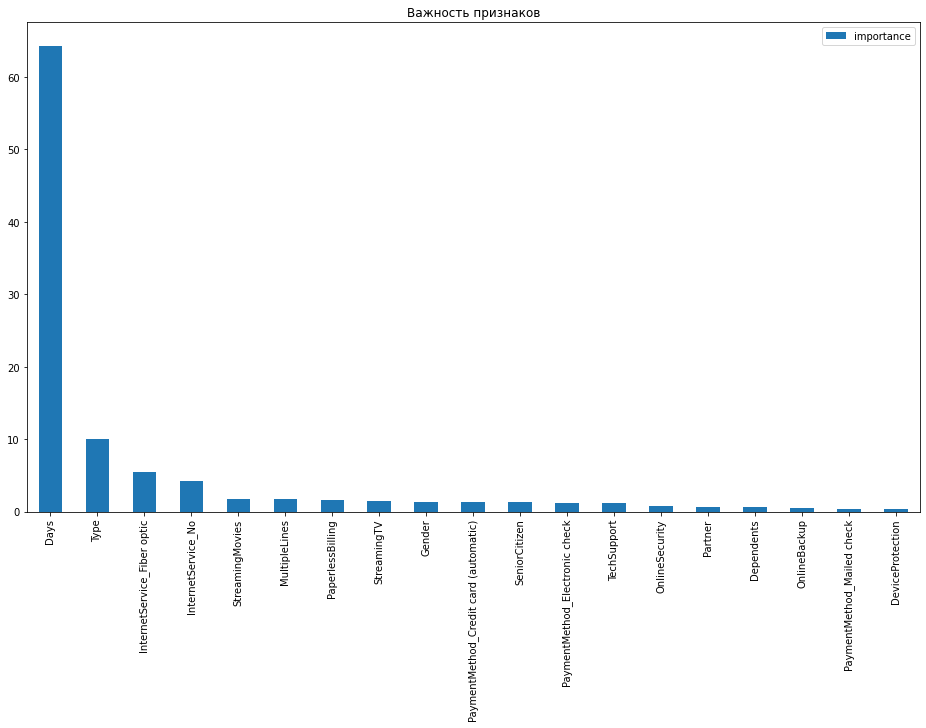

In [58]:
features_importance = cb.get_feature_importance()
# features_importance = sorted(features_importance, reverse=True)

importance = pd.DataFrame(data=features_importance, index=list(X_test.columns), columns=['importance'])

importance.sort_values(by='importance', ascending=False).plot(kind='bar',
                                                              figsize=(16,9),
                                                              title='Важность признаков')

Можно увидеть, что для CatBoost'a есть 4 самых важных признака: кол-во дней, тип подлючения, подключения оптического кабеля и отсутствие интернет служб.

<div class="alert alert-warning">
<b>**Комментарий тимлида_v2 ⚠️:**</b>

Не верно рисуешь график. У тебя отсортированы значения признаков, но сами признаки в том порядке, что и были в модели. Исправь, либо используй просто графики зи Seaborn sns.barplot(x='Feature Id', y='Importances', data=features_importance.reset_index())
 
В отчете поправь пожалуйста.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

    
Упс, исправила) </div>

In [ ]:
y_pred = cb.predict(X_test)

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt='3.0f')
plt.title('Матрица ошибок', y=1.05, size=15)

Модель отлично справляется с предсказанием отрицательного класса (клиент не уйдёт), но с предсказанием ухода клиента делает частые ошибки, но и не угадывает. Модель также чаще предсказывает отрицательный класс, что необходимо для бизнеса: определить, уйдет ли клиент.

<div class="alert alert-success">
<b>**Комментарий тимлида_v3 ✔️:**</b>

Виктория, привет! Получилось хорошее и качественное исследование!
    
Обработка данных, размышления над признаками, поиск и сравнение различных вариантов обучающего датасета. Конечные результаты, графика - многое удалось как надо. Можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.
А что совсем хорошо, так это то, что нет гонки за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки - всегда есть соблазн их оставить...)
    
Прежде, чем пойти дальше хочу обратить особое внимание на следующие пункты:
    
1. F1, Accuracy и AUC - отличные метрики, но нужно держать в голове, что это лишь обобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть".


2. При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:

- колличественная-колличественная: аналитически метод - корреляции, графический - скатерплот.
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент), графический - боксплот.
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма
Это я к тому разделу, который посвящён анализу данных. Там сделаны интересные предположения и их аналитическая проверка. Очень важные этапы любого исследования, где требуется определить валидность использования признаков из датасета.
    
3. Алгоритм нахождения модели может быть таким:

- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.
- генерируем разные факторы влияния - любые.
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.
- Оцениваем мультиколлинеарность.
- Готовим подходящий датасет (масштабируем, убираем лишние признаки, кодируем)
- Строим модели и анализируем те фактры, какие сгенерировали ранее.
- Думаем над тем, какие причины (факторы) могут ещё влиять на таргет.
- Если после нескольких итераций точность "замирает" - значит достигли потолка)
    
4. Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высокая метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

Вопросов у меня больше нет, работу принимаю, твоя метрика ROC-AUC = 0.90 что соответствует 6sp. 

Не забудь перед подготовкой отчета еще раз прочитать мои рекомендации по его составлению (что проверяется и на что обращается внимание при проверке). Нужно описание предобработки данных, сводной таблицы моделей на кроссвалидации, график важности признаков итоговой модели, результаты итоговой модели (аккураси и рос-аук, и гиперпараметры).

    
</div>

## Отчет

Были выполнены практически все пункты плана, в том числе была добавлена еще модель для исследования: CatBoostClassifier. К сожалению, в задуманные сроки не удалось уложиться, т.к. возникали ошибки по ходу написания кода, которые надо было исправлять (об этом ниже).

Главная трудность возникала при написании модели CatBoostClassifier, где не получилось подать "грязные" данные на вход из-за `ValueError isChurn is not in List`. Через несколько попыток исправлений решила это обойти с помощью закодированных данных.

Ключевые шаги в работе:
* Изучить таблицы с данными по отдельности
* Поменять типы данных и разобраться с пропусками
* Выделить таргет и создать синтетический признак
* Соединить таблицы
* Провести исследовательский анализ данных
* Провести анализ влияния факторов через аналитический метод (VIF)
* Поиск наилучшей модели
* Тестирование лучшей модели

**Как проходила предобработка данных?**
1. Вывела все таблицы и изучила их структуру
2. Перевела строки с датами в тип данных `datetime`, чтобы можно было с ними работать как с числами
3. При попытке изменении типа данных в колонке общего дохода от клиента, было обнаружено, что датасет собран на момент 2020-02-01
4. В следствие этого пропуски в колонке общего дохода от клиента были заполнены нулями, т.к. клиент не успел еще внести "тотал"
5. Далее создала синтетический признак на основе двух имеющихся: дата начала договора и дата его окончания. Сделано это для выведени "лояльности" клиента. Ведь чем дольше он с компанией, тем меньше шансов его ухода.
6. Соединила таблицы.
7. Пропуски в новом датафрейме заполнила `No`, т.к. отсутствие ID клиента в той или иной таблице подразумевает отсутствие и самой услуги у клиента.
8. Удалила признаки с датами для избежание утечки данных (особенно дата окончания договора).
9. Провела проверку на мультиколлинеарность с помощью VIF, в результате которого было удалено два признака. Данная проверка проводилась для работы с линейными моделями и избежания сильных зависимостей.
10. Кодировала категориальные признаки сочетая два способа: OneHotEncoding и LabelEncoding (в ретроспективе понимаю, что для некоторых признаков надо было сделать OHE, а не LabelEncoding, например в колонке `Gender`)

Для обучения модели использовалась часть старых признаков и два новых. Удалены временные признаки, т.к. это не анализ временных рядов и можно получить утечку данных. Добавлен таргет из даты окончания договора - ушел клиент или нет? И добавлено кол-во дней активного договора из обеих дат (начала и окончания договора), показывающий лояльность клиента.

<AxesSubplot:title={'center':'Важность признаков'}>

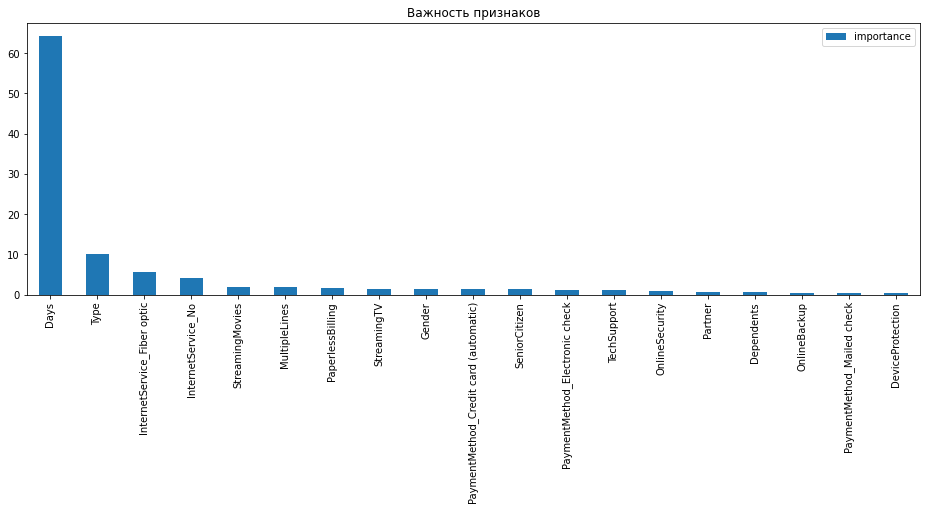

In [59]:
importance.sort_values(by='importance', ascending=False).plot(kind='bar',
                                                              figsize=(16,5),
                                                              title='Важность признаков')

После анализа важности признаков можно сделать вывод о ненадобности последних пяти признаков: наличие партнера, наличие иждивенцев, две услуги и способ оплаты через почту. Если бизнес будет использовать модель в будущем, то эти данные не нужно собирать для предсказывания ухода от компании.

In [60]:
indexes = ['LogisticRegression', 'RandomForestClassifier', 'KNN', 'CatBoostClassifier']
data = [0.845830, 0.8581262210692862, 0.8531185164641819, 0.9280533033108837]

pivot = pd.DataFrame(data=data, index=indexes, columns=['CrossValidation Score'])

Сравнение моделей на кросс-валидации ниже.

In [61]:
pivot.sort_values(by='CrossValidation Score', ascending=False)

,CrossValidation Score
CatBoostClassifier,0.928053
RandomForestClassifier,0.858126
KNN,0.853119
LogisticRegression,0.845830


В качестве итоговой модели выбран CatBoostClassifier.

**Оценки итоговой модели** <br>

Accuracy: 0.878637 <br>
ROC-AUC: 0.908053

<div class="alert alert-danger">
<b>**Комментарий тимлида_v4 ✔️:**</b>

Хорошие ответы на основные вопросы задания. В целом все ок, но для полноты отчета не хватает следующих разделов:

* Описан процесс предобработки данных (что делаем с данными и почему).
* Описаны признаки, какие используются  для обучения (объяснено почему именно они).
* Представлен анализ важности признаков итоговой модели.

В идеале - отчёт должен быть таким, чтобы по нему можно было воспроизвести проект, не смотря в код.
    
Пожалуйта доработай отчет и высылай его на проверку.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>

Доработала! </div>

<div class="alert alert-success">
<b>**Комментарий тимлида_v5 ✔️:**</b>

Цель проекта достигнута, создана модель прогнозирования оттока клиентов с заданным качеством работы, сформирован отчет по исследованию.

Возможно повторюсь - хорошая структурированная работа, глубокое и основательное исследование.  Отличный отчет, есть основные этапы исследования, сравнение с первоначальным планом, трудности, с которыми пришлось столкнуться. Хорошо описан процесс предобработки данных, есть анализ мультиколлинеарности и важности признаков итоговой модели.

Хочу заострить твое внимание на важных этапах исследования и выводов по ним, которые должны быть в любом отчете исследования в области DataScience:

- описание предобработки данных. Крайне важный процесс, т.к. все исследование  и моделирование будет строиться на данных. Не забывай уделять этому особое внимание.
    
- анализ мультколлинеарности и важности признаков итоговой модели. По итогу можно значительно упростить как модель (убрать лишние признаки) так и облегчить жизнь бизнеса - выдать рекомендации относительно важности признаков и влияния их на отток (в нашем случае). 

-  портрет уходящего клиента. В нашей работе это не являлось главным и вообще не требовалось. Однако нужно понимать - мы работаем с бизнесом и результаты нашего анализа (пусть и возникшие побочно) очень пригодятся маркетингу для создания программ по удержанию клиентов.  
<br>

Еще раз - отличное исследование, ты молодец! 
    
<br>
Поздравляю с выполнением дипломной работы и завершением финального спринта! Ура!!!

</div>


<div class="alert alert-success">
<b>**Комментарий тимлида [ФИНАЛЬНЫЙ] ✔️:**</b>

Привет Виктория!

Хочу дать тебе обратную связь, как тимлид, по финальному проекту. 

В твоей работе мне очень понравилось:
- Владение инструментарием ДС. По исследованию видно, что ты понимаешь что делаешь, владеешь основным инструментарием, успешно его применяешь и хорошо интерпретируешь результаты. Вижу, что знания, полученные в ходе обучения, уверенно перешли в навыки и стали уже твоими Hard Skills. 
- Кроссвалидация и подбор гиперпараметррв. Круто, что в работе используются инструменты типа GridSearchCV , RandomSearchCV, HalvingGridSearchCV или Optuna. Это  очень мощные инструменты для поиска оптимальных гиперпараметров.
- Очень здорово, что есть  анализ мультиколлинеарности – отдельно для числовых, отдельно для категориальных признаков. Отлично что ты понимаешь суть коэфициента корреляции Пирсона, Спирмена и хи-квадрат. Круто что использовала VIF!


Над чем еще можно поработать:
- Тайминг. Некоторые работы ты сдавал награни дедлайна. Хорошо, что все в итоге получилось сделать до жесткого дедлайна, но в реальной работе лучше до этого не доводить. Настоящая работа - это не подготовка к сдаче экзаменов в сессии, нужно планировать заранее и выполнять работу чуть раньше крайного срока, чтобы было достаточно времени на ее доработку.
- Немного улучить и причесать код. Лично я предпочитаю, чтобы функции были описаны сразу после импортов. Но это дело вкуса. Повторяющиеся действия можно было бы выделить в отдельную функцию. Это удобнее и нагляднее.  Решение – больше самостоятельной практики, больше изучай чужой код.
- Оформление исследования и отчет. По каждому блоку работы в описательной части хорошо бы придерживаться схемы – что планируешь делать (гипотеза), что будешь использовать для ее подтверждения или опровержения (используемые методы и алгоритмы), само исследование с краткими пояснениями по каждому результату, общий вывод (подтвердилась гипотеза или нет). У тебя местами это присутствует, но не везде.  Если хочешь добавить данный проект в портфолио – лучше оформить его в соответствии с требованиями к оформлению проекта. В текущем виде его сложно читать человеку, не погруженному в тему исследования. Решение – еще раз освежить в памяти раздел обучения, где рассказывается о том, как оформлять проект. Примеры хороших отчетов можно посмотреть на  сайте Stanford University ( http://cs229.stanford.edu/projects2014.html ). Это отчеты по финальным проектам направления Machine Learning. Изучая их становится понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета.
- Портрет клиента. Можно было в ходе EDA сформировать портрет уходящего клиента. Это крайне важно для бизнеса (отдел маркетинга будет очень рад этой информации)
Решение - более детально проводить EDA для формирования результатов не только в с целью проектирования признаков для модели, но и для  предоставления инсайтов бизнесу.
    
Позади большой путь освоения новой специальности! Решение поставленной задачи в рамках финального проекта показало, что у тебя достаточно знаний и навыков для выполнения исследовательских работы в области ДС как минимум на уровне Джуна. Не останавливайся на достигнутом – изучай новые методы и подходы, практикуйся в решении различных задач (куча задач есть на Kaggle). Рекомендую очень серьезно и обстоятельно готовиться к собеседованиям, это тоже очень важная часть процесса трудоустройства. 

Еще раз поздравляю тебя с завершением учебы! Желаю скорейшего трудоустройства и успехов в новой профессии! Главное – это заниматься тем, что тебе нравится!

</div>